In [ ]:
pip install bokeh

376157
0        0.000005
1        0.000005
2        0.000005
3        0.000005
4        0.000005
           ...   
35034    0.000000
35035    0.000000
35036    0.000167
35037    0.000000
35038    0.000000
Length: 35039, dtype: float64


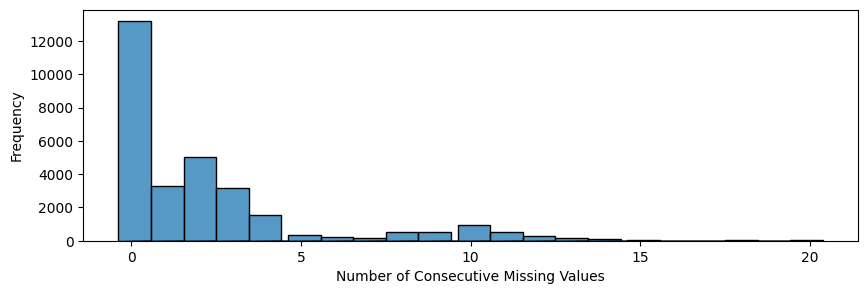

In [34]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def count_consecutive_zeros(df):
    zeros_count = df.apply(lambda x: x.astype(str).str.count('-1')).sum(axis=1)
    

    sum_zeros = zeros_count.sum()
    return zeros_count,sum_zeros

if __name__ == "__main__":
    file_path = 'C:/Users/Tarek Zahid/Desktop/xie/Sensor Files/5. dataset/I15 NB/full -1/train.csv'
    df = pd.read_csv(file_path)
    zeros_count,sum_zeros = count_consecutive_zeros(df)
    
    print(sum_zeros)
    print(zeros_count/sum_zeros)

    plt.figure(figsize=(10, 3))
    sns.histplot(zeros_count, binrange= (0,20), kde=False, shrink=5)
    #plt.title('Distribution of Consecutive Zeros across Columns')
    plt.xlabel('Number of Consecutive Missing Values')
    plt.ylabel('Frequency')
    plt.show()


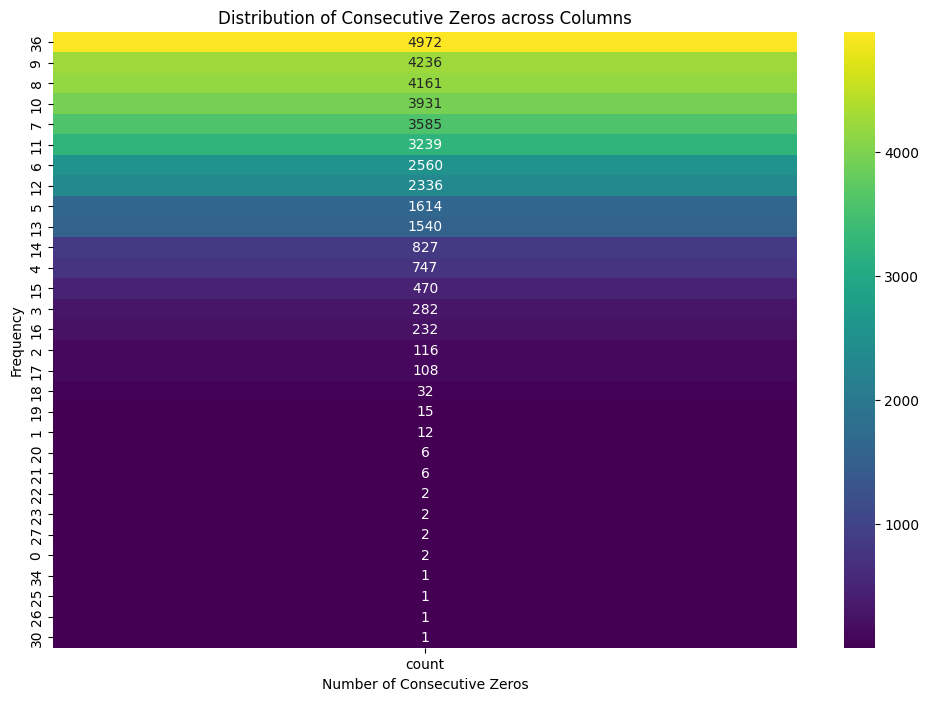

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def count_consecutive_zeros(df):
    zeros_count = df.apply(lambda x: x.astype(str).str.count('0')).sum(axis=1)
    return zeros_count

if __name__ == "__main__":
    file_path = 'C:/Users/Tarek Zahid/Desktop/xie/Sensor Files/5. dataset/215 NB/full 0/train_0_215 NB.csv'
    df = pd.read_csv(file_path)
    zeros_count = count_consecutive_zeros(df)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pd.DataFrame(zeros_count.value_counts()), annot=True, cmap='viridis', fmt='g')
    plt.title('Distribution of Consecutive Zeros across Columns')
    plt.xlabel('Number of Consecutive Zeros')
    plt.ylabel('Frequency')
    plt.show()


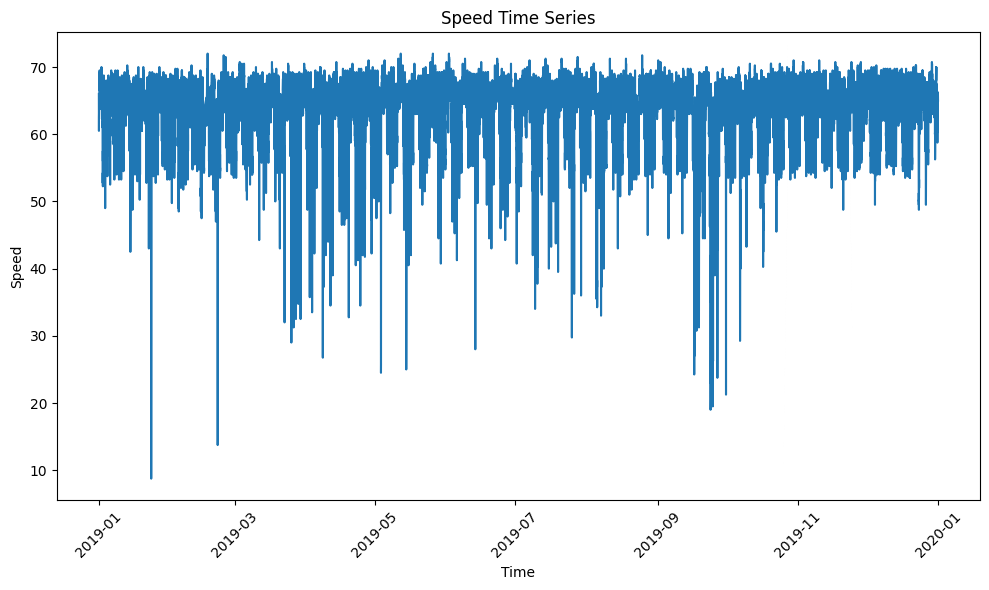

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('E:/xie/Sensor Files/3. filled w empty rows - fixed to 35040 rows/2019/10.2.268_emptyrows.csv')

# Convert 'DateTimeStamp' column to datetime type
df['DateTimeStamp'] = pd.to_datetime(df['DateTimeStamp'])

# Set 'DateTimeStamp' column as index
df.set_index('DateTimeStamp', inplace=True)

# Plot the time series graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Speed'])
plt.xlabel('Time')
plt.ylabel('Speed')
plt.title('Speed Time Series')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
import os
import pandas as pd

def concatenate_speed_columns(directory):
    speed_columns = []  # List to store 'Speed' columns
    
    # Iterate over files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".csv"):
            filepath = os.path.join(directory, filename)
            df = pd.read_csv(filepath)
            # Check if 'Speed' column exists
            if 'Speed' in df.columns:
                speed_columns.append(df['Speed'])
            else:
                print(f"Warning: 'Speed' column not found in {filename}. Skipping...")
    
    # Concatenate all 'Speed' columns if at least one is found
    if speed_columns:
        combined_speed = pd.concat(speed_columns, ignore_index=True)
        # Save the concatenated 'Speed' column as CSV
        combined_speed.to_csv('E:/xie/Sensor Files/3. filled w empty rows - fixed to 35040 rows/2018/concatenated_speed.csv', index=False)
        print("Concatenated 'Speed' column saved successfully as 'concatenated_speed.csv'.")
    else:
        print("Error: No 'Speed' column found in any CSV file.")

# Example usage:
directory_path = 'E:/xie/Sensor Files/3. filled w empty rows - fixed to 35040 rows/2018'
concatenate_speed_columns(directory_path)


Concatenated 'Speed' column saved successfully as 'concatenated_speed.csv'.


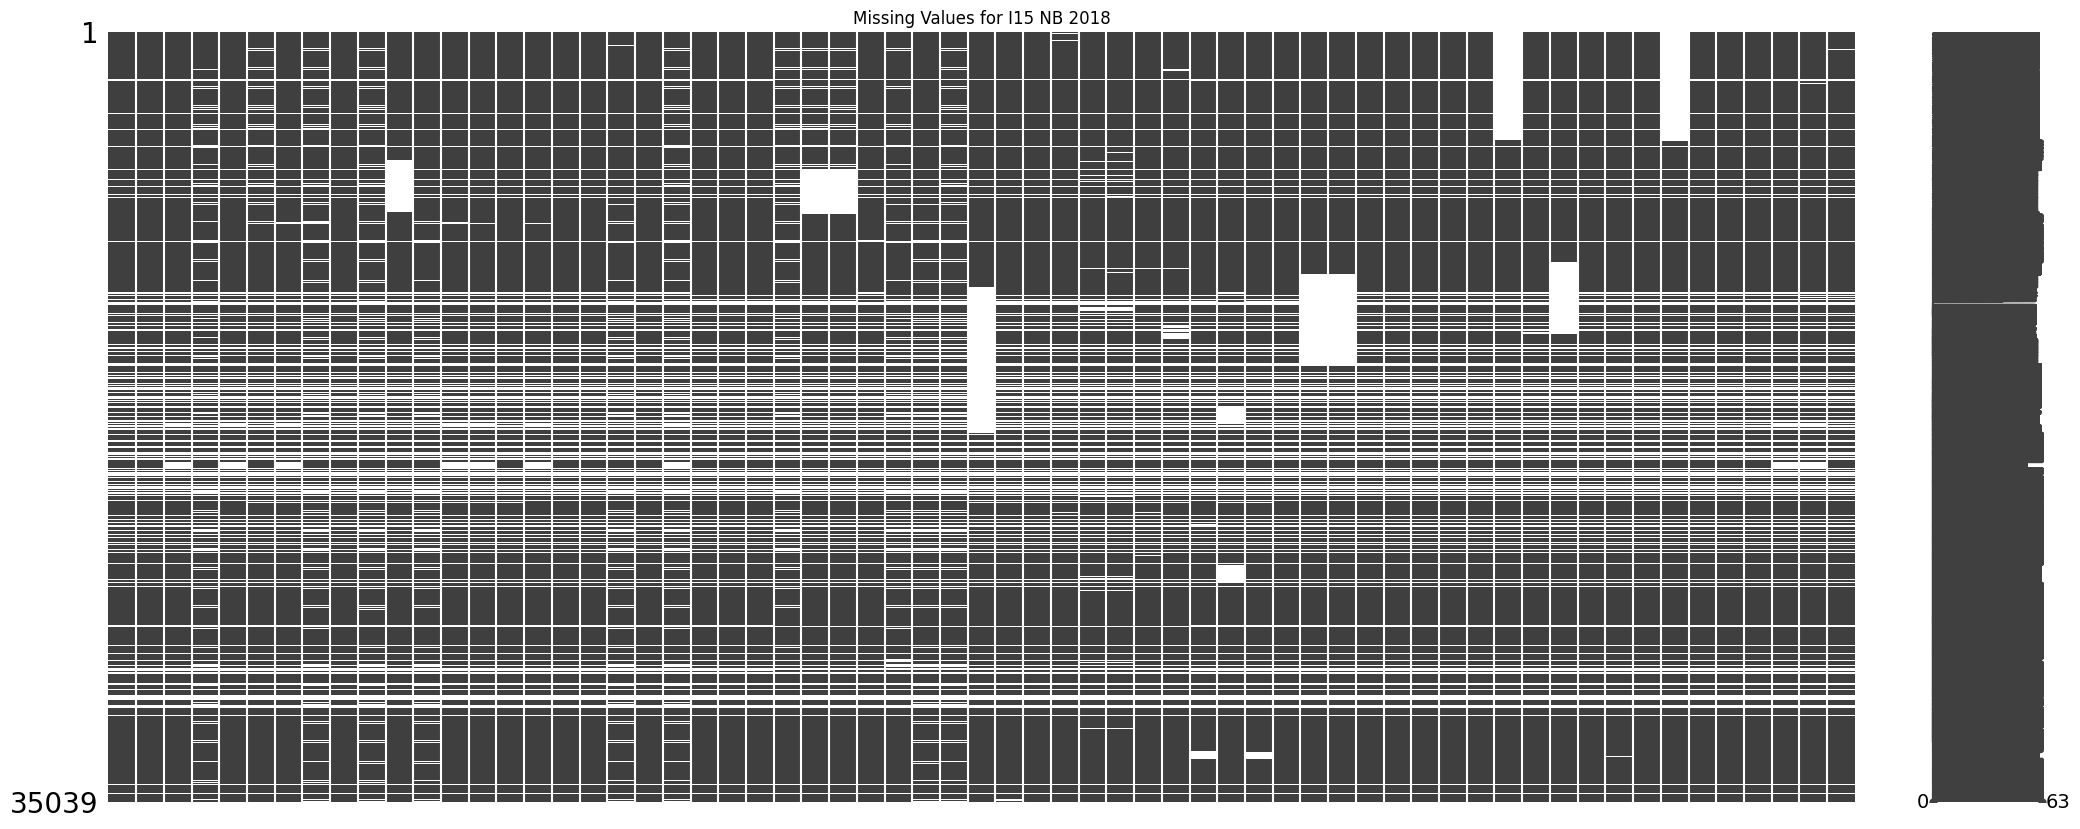

In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

# Function to visualize missing values of a CSV file column by column in the same image
def visualize_missing_values(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Replace -1 with NaN
    df.replace(-1, np.nan, inplace=True)
    
    # Plot missing values for all columns in the same image
    msno.matrix(df)
    plt.title('Missing Values for I15 NB 2018')
    plt.show()

# Specify the filepath of the CSV file
file_path = 'E:/xie/Sensor Files/5. dataset/I15 NB/full -1/train.csv'

# Call the function
visualize_missing_values(file_path)
